# Accessing the project directory on my Google Drive  

In [1]:
import os
from google.colab import drive

drive.mount('/drive', force_remount=False)
project_dir = "/drive/My Drive/RNNSeq2Seq/"

# change working directory to project_dir
os.chdir(project_dir)

Mounted at /drive


# Dependencies

In [2]:
from scripts.model import *
from scripts.dataloader import create_dataloader
from scripts.utils import *
from scripts.pytorch_utils import *
import matplotlib.pyplot as plt

# Helper function to help visualize 

In [3]:
def plot_log(log):
    len_range = len(log) -1 if "Best eval accu" in log else len(log)
    epoch_nums, train_loss, dev_loss = [], [], []
    train_acc, dev_acc = [], []

    for epoch in range(1, len_range+1):
        epoch_nums.append(epoch)
        train = log[f"Epoch#{epoch}"]["Train"]
        dev = log[f"Epoch#{epoch}"]["Eval"]
        train_loss.append(train['loss'])
        train_acc.append(train['abosulate accuracy'])

        dev_loss.append(dev['loss'])
        dev_acc.append(dev['abosulate accuracy'])

    ax1 = plt.subplot(211)
    ax1.plot(epoch_nums, train_loss, label="train loss")
    ax1.plot(epoch_nums, dev_loss, label="dev loss")
    ax1.legend()

    ax2 = plt.subplot(212)
    ax2.plot(epoch_nums, train_acc, label="train acc")
    ax2.plot(epoch_nums, dev_acc, label="dev acc")
    ax2.legend()
    plt.show()

In [4]:
folder = "tuning_data/"
experiment_num = 1
shuffle_batch = False

# must be the num of seq per seq length if shuffle_batch is False
# this "tr_batch_size" will be used for dev, and shuffled test sets
tr_batch_size = 250 
dev_batch_size = 500 if not shuffle_batch else tr_batch_size

In [5]:
# setups for training and evaluting

print_freq = 5
acc_threshold = 0.8 # for saving the best trained models 
max_epoch_num = 100 # max num of epoches 
train_acc_exit=0.9999 # train acc exit threshold (eval_acc_exit must also be met)
eval_acc_exit=0.995 # dev acc exit threshold (train_acc_exit must also be met)
teacher_forcing_ratio = 1.0 # probability of using real symbol from target sequence for training

# RevStr

In [6]:
train = read_data(join(folder, "RevStr/train.txt"))
dev = read_data(join(folder, "RevStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [13]:
in_vocab = ascii_lowercase
out_vocab = ascii_lowercase
in_vocab_size = len(in_vocab) + 2
out_vocab_size = len(out_vocab) + 2

hidden_size = 128
embd_dim = 128
num_layers = 1
rnn_type = "RNN"
dropout_rate = 0.0
bidirectional = True
use_attention = True
reduction_method = torch.sum

learning_rate = 5e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [14]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.5542720019817353, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.021780353039503098, 'overlap rate': 0.2594190161675215}
evaluation performance: {'loss': 2.73656080365181, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.02203448424115777, 'overlap rate': 0.19162042252719402}

Current epoch: 10, 
training performance: {'loss': 1.9593409091234206, 'abosulate accuracy': 0.00010000000474974513, 'consecutive overlap rate': 0.08140163943171501, 'overlap rate': 0.4624262474477291}
evaluation performance: {'loss': 2.534662002325058, 'abosulate accuracy': 0.00025000000605359676, 'consecutive overlap rate': 0.08690205430611968, 'overlap rate': 0.2715298067778349}

Current epoch: 15, 
training performance: {'loss': 1.4753579035401345, 'abosulate accuracy': 0.021700001123826952, 'consecutive overlap rate': 0.23984334636479615, 'overlap rate': 0.6193217143416405}
evaluation performance: {'loss': 1.8152095317840575, 'abosulate ac

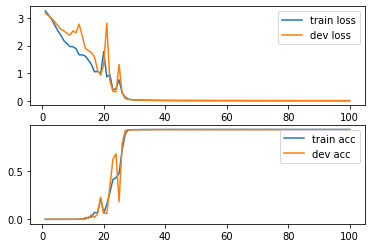

In [15]:
plot_log(log)

## Hyperparameter set 2

In [16]:
hidden_size = 128
embd_dim = 64
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.686841517686844, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.020009376830421387, 'overlap rate': 0.22243333645164967}
evaluation performance: {'loss': 2.7046675205230715, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.023288772767409684, 'overlap rate': 0.21533532962203025}

Current epoch: 10, 
training performance: {'loss': 1.9608845949172973, 'abosulate accuracy': 0.00010000000474974513, 'consecutive overlap rate': 0.07273269966244697, 'overlap rate': 0.43969563990831373}
evaluation performance: {'loss': 2.3828563153743745, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.06601662915199995, 'overlap rate': 0.3061668988317251}

Current epoch: 15, 
training performance: {'loss': 1.5686869993805885, 'abosulate accuracy': 0.012300000491086394, 'consecutive overlap rate': 0.15544696636497973, 'overlap rate': 0.5861951783299446}
evaluation performance: {'loss': 2.3505464136600493, 'abosulate accuracy': 5.000

KeyboardInterrupt: ignored

# RedStr



In [18]:
train = read_data(join(folder, "RedStr/train.txt"))
dev = read_data(join(folder, "RedStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [19]:
in_vocab = ascii_lowercase
out_vocab = ascii_lowercase
in_vocab_size = len(in_vocab) + 2
out_vocab_size = len(out_vocab) + 2

hidden_size = 128
embd_dim = 128
num_layers = 1
rnn_type = "RNN"
dropout_rate = 0.0
bidirectional = True
use_attention = True
reduction_method = torch.sum

learning_rate = 5e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.5143020689487456, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.02612335516605526, 'overlap rate': 0.28396481834352016}
evaluation performance: {'loss': 2.7129687130451203, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.025421299203298987, 'overlap rate': 0.19948628563433884}

Current epoch: 10, 
training performance: {'loss': 1.917726218700409, 'abosulate accuracy': 0.0019000000902451575, 'consecutive overlap rate': 0.12033793544396758, 'overlap rate': 0.49083976037800314}
evaluation performance: {'loss': 2.428207153081894, 'abosulate accuracy': 0.0011500000429805369, 'consecutive overlap rate': 0.10015545757487417, 'overlap rate': 0.3158190377056599}

Current epoch: 15, 
training performance: {'loss': 1.4556708201766013, 'abosulate accuracy': 0.013100000354461372, 'consecutive overlap rate': 0.22454520370811223, 'overlap rate': 0.611238171160221}
evaluation performance: {'loss': 2.08010438978672, 'abosulate accu

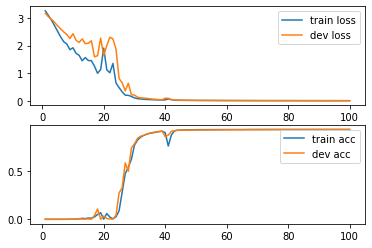

In [21]:
plot_log(log)